## Random Forest Regressor

#### Definição de problema
O problema aqui é prever o consumo de gás (em milhões de galões) em 48 dos estados dos EUA com base na taxa de gasolina (em centavos), renda per capita (dólares), rodovias pavimentadas (em milhas) e a proporção da população com o carteira de motorista.

#### Solução
Para resolver esse problema de regressão, usaremos o algoritmo de Random Forest através da biblioteca Python do Scikit-Learn. Seguiremos o pipeline tradicional de aprendizado de máquina para resolver esse problema

In [60]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
df_petrol = pd.read_csv('petrol_consumption.csv')  

In [23]:
df_petrol.head()

Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410

#### Preparando Dados Para Treinamento
Duas tarefas serão executadas nesta seção. A primeira tarefa é dividir os dados em conjuntos 'variaveis' e 'target'. Os dados resultantes são então divididos em conjuntos de treinamento e teste.

O script a seguir divide os dados em variaveis e target:

In [24]:
X = df_petrol.iloc[:, 0:4].values  
y = df_petrol.iloc[:, 4].values  

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

### Escala de features
Sabemos que nosso conjunto de dados ainda não é um valor escalado, por exemplo, o campo Average_Income tem valores no intervalo de milhares, enquanto Petrol_tax tem valores no intervalo de dez. Portanto, seria benéfico dimensionar nossos dados (embora, como mencionado anteriormente, essa etapa não seja tão importante para o algoritmo de florestas aleatórias). Para fazer isso, usaremos a aula do Scikit-Learn StandardScaler. Execute o seguinte código para fazer isso:

In [26]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

#### Treinando o Algoritmo
Agora que escalamos nosso conjunto de dados, é hora de treinar nosso algoritmo de floresta aleatória para resolver esse problema de regressão. Execute o seguinte código:

In [27]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

A RandomForestRegressor classe do sklearn.ensemble biblioteca é usada para resolver problemas de regressão via floresta aleatória. O parâmetro mais importante da RandomForestRegressor classe é o parâmetro n_estimators. Esse parâmetro define o número de árvores na floresta aleatória. Vamos começar com n_estimator=20 para ver como o nosso algoritmo funciona.

#### Avaliando o Algoritmo
A última e última etapa da solução de um problema de aprendizado de máquina é avaliar o desempenho do algoritmo. Para problemas de regressão, as métricas usadas para avaliar um algoritmo são erro absoluto médio, erro quadrático médio e erro quadrático médio raiz. Execute o seguinte código para encontrar estes valores:

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 51.76500000000001
Mean Squared Error: 4216.166749999999
Root Mean Squared Error: 64.93201637097064


Com 20 árvores, o erro quadrático médio da raiz é 64,93, o que é superior a 10% do consumo médio de gasolina, ou seja, 576,77. Isso pode indicar, entre outras coisas, que não usamos estimadores suficientes (árvores).

Se o número de estimadores for alterado para 200, os resultados serão os seguintes:

In [29]:
regressor = RandomForestRegressor(n_estimators=200, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 48.33899999999999
Mean Squared Error: 3494.2330150000003
Root Mean Squared Error: 59.112037818028234


In [35]:
X_test

array([[ 1.35447518, -1.33452296, -0.31161731, -1.48308699],
       [ 0.36314126,  0.15174391, -1.44873146, -0.57895909],
       [ 0.36314126, -1.6194839 , -0.10974518, -0.5080471 ],
       [-0.62819265, -1.26188585,  0.29615525, -1.03988704],
       [ 0.36314126, -2.33654247,  0.19346729,  0.02379284],
       [-0.62819265, -0.78322597,  0.1560037 ,  0.16561682],
       [ 0.36314126, -1.47048471, -0.62291545, -1.58945498],
       [-0.62819265,  0.2448684 , -0.31458205,  0.87473675],
       [ 0.36314126,  1.50577399, -0.98865707, -0.41940711],
       [ 0.36314126,  0.13684399,  0.0357968 , -0.82715107]])

# Random Forest Classifier

### Dados
O conjunto de dados provém do repositório UCI Machine Learning e está relacionado com campanhas de marketing direto (chamadas telefónicas) de uma instituição bancária portuguesa. O objetivo da classificação é prever se o cliente irá assinar (1/0) para um depósito a prazo (variável y). 

- age (numérico)
- job: tipo de trabalho (categórico: “admin”, “colarinho azul”, “empreendedor”, “empregada doméstica”, “gerência”, “aposentado”, “autônomo”, “serviços”, “estudante”, “técnico”) "," Desempregado "," desconhecido ")
- marital: estado civil (categórico: “divorciado”, “casado”, “solteiro”, “desconhecido”)
- education (categórico: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “analfabeto”, “professional.course”, “university.degree”, “unknown”)
- default: tem crédito no padrão? (categórico: “não”, “sim”, “desconhecido”)
- housing: tem empréstimo habitacional? (categórico: “não”, “sim”, “desconhecido”)
- loan: tem empréstimo pessoal? (categórico: “não”, “sim”, “desconhecido”)
- contact: tipo de comunicação de contato (categórico: “celular”, “telefone”)
- month: último mês de contato do ano (categórico: “jan”, “fev”, “mar”,…, “nov”, “dec”)
- day_of_week: último dia de contato da semana (categórico: "mon", "tue", "wed", "thu", "fri")
- duration: duração do último contato, em segundos (numérico). Nota importante: este atributo afeta altamente a meta de saída (por exemplo, se a duração for = 0, então y = 'não'). A duração não é conhecida antes de uma chamada ser realizada, também, após o término da chamada, y é obviamente conhecido. Assim, essa entrada deve ser incluída apenas para fins de benchmark e deve ser descartada se a intenção for ter um modelo preditivo realista.
- campaign: número de contatos realizados durante esta campanha e para este cliente (numérico, inclui o último contato)
- pdays: número de dias que passaram depois que o cliente foi contatado pela última vez de uma campanha anterior (numérico; 999 significa que o cliente não foi contatado anteriormente)
- previous: número de contatos realizados antes desta campanha e para este cliente (numérico)
- poutcome: resultado da campanha de marketing anterior (categórico: “fracasso”, “inexistente”, “sucesso”)
- emp.var.rate: taxa de variação do emprego - (numérico)
- cons.price.idx: índice de preços ao consumidor - (numérico)
- cons.conf.idx: índice de confiança do consumidor - (numérico)
- euribor3m: euribor taxa de 3 meses - (numérico)
- nr.employed: número de funcionários - (numérico)

Predizer variable (target desejado):

- y - o cliente assinou um depósito a prazo? (binário: “1” significa “Sim”, “0” significa “Não”)

In [87]:
df = pd.read_csv('bank.csv')

In [88]:
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y  
0  cellular   19   oct        79         1     -1         0  unknown  0  
1  cellular   11   may       220         1    339         4  failure  0  
2  cellular   16   apr       185         1    330         1  failure  0  
3   unknown    3   jun       199         4     -1         0  unknown  0  
4   unknown    5   may       226         1     -1         0  unknown  0

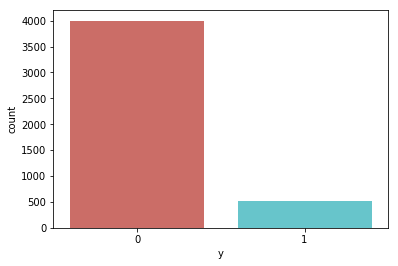

In [89]:
df.y.value_counts()
sns.countplot(x = 'y', data = df, palette = 'hls')
plt.show()

In [90]:
df.groupby('y').mean()

age      balance        day    duration  campaign      pdays  \
y                                                                       
0  40.998000  1403.211750  15.948750  226.347500  2.862250  36.006000   
1  42.491363  1571.955854  15.658349  552.742802  2.266795  68.639155   

   previous  
y            
0  0.471250  
1  1.090211

### Separar target de features 

In [93]:
X = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
            'previous', 'poutcome']]
y = df['y']

### Separar modelo em treino e teste

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [95]:
randomclassifier = RandomForestClassifier()  
randomclassifier.fit(X_train, y_train)  

/home/pc/projects/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'admin.'

### Como neste caso temos variaveis categoricas, precisamos transforma-las em dummies 

In [96]:
X_dummies = pd.get_dummies(X)

In [97]:
X_dummies.head()

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   30     1787   19        79         1     -1         0           0   
1   33     4789   11       220         1    339         4           0   
2   35     1350   16       185         1    330         1           0   
3   30     1476    3       199         4     -1         0           0   
4   59        0    5       226         1     -1         0           0   

   job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  month_may  \
0                0                 0  ...          0          0          0   
1                0                 0  ...          0          0          1   
2                0                 0  ...          0          0          0   
3                0                 0  ...          1          0          0   
4                1                 0  ...          0          0          1   

   month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0          0          1          0                 0               0   
1          0          0          0                 1               0   
2          0          0          0                 1               0   
3          0          0          0                 0               0   
4          0          0          0                 0               0   

   poutcome_success  poutcome_unknown  
0                 0                 1  
1                 0                 0  
2                 0                 0  
3                 0                 1  
4                 0                 1  

[5 rows x 51 columns]

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X_dummies,y,test_size=0.20,random_state=0)

In [99]:
randomclassifier.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
y_pred = randomclassifier.predict(X_test)  

### Avaliacao dos resultados

In [101]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print("Accuracy:",accuracy_score(y_test, y_pred))  

[[780  13]
 [ 82  30]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       793
           1       0.70      0.27      0.39       112

   micro avg       0.90      0.90      0.90       905
   macro avg       0.80      0.63      0.66       905
weighted avg       0.88      0.90      0.87       905

Accuracy: 0.8950276243093923


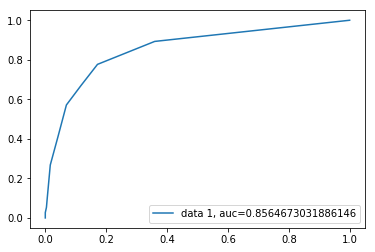

In [102]:
y_pred_proba = randomclassifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Definição de problema
A tarefa aqui é prever se uma nota de moeda bancária é autêntica ou não baseada em quatro atributos, isto é, variação da imagem transformada por wavelet de imagem, assimetria, entropia e curtose da imagem.

#### Solução
Este é um problema de classificação binária e usaremos um classificador de floresta aleatório para resolver esse problema. As etapas seguidas para resolver esse problema serão semelhantes às etapas executadas para a regressão.

In [44]:
df_auth = pd.read_csv("bill_authentication.csv")  

In [45]:
df_auth.head()

Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [46]:
X = df_auth.iloc[:, 0:4].values  
y = df_auth.iloc[:, 4].values  

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [48]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [49]:
randomclassifier = RandomForestClassifier(n_estimators=20, random_state=0)  
randomclassifier.fit(X_train, y_train)  
y_pred = randomclassifier.predict(X_test)  

Em caso de regressão, usamos a RandomForestRegressorclasse da biblioteca sklearn.ensemble. Para classificação, iremos RandomForestClassifier classe da biblioteca sklearn.ensemble. RandomForestClassifier classe também leva n_estimatorscomo um parâmetro. Como antes, esse parâmetro define o número de árvores em nossa floresta aleatória. Vamos começar com 20 árvores novamente.

#### Avaliando o Algoritmo
Para problemas de classificação, as métricas usadas para avaliar um algoritmo são precisão, matriz de confusão, recuperação de precisão e valores de F1. Execute o seguinte script para encontrar estes valores:

In [50]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[155   2]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

   micro avg       0.99      0.99      0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9890909090909091


98,90% é uma boa precisão, então não há muito sentido em aumentar nosso número de estimadores de qualquer maneira. Podemos ver que aumentar o número de estimadores não melhorou ainda mais a precisão.

A curva Receiver Operating Characteristic (ROC) é um gráfico da taxa positiva verdadeira (Recall) contra a taxa de falsos positivos. Mostra a troca entre sensibilidade e especificidade.

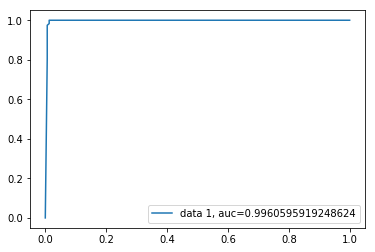

In [53]:
y_pred_proba = randomclassifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()